## Table of Content

# Background

## Problem statement

Rental bikes are being introduced in many urban areas to improve mobility convenience. Seoul's "Ddareungi" is a public bike-sharing service that offers a convenient and eco-friendly way to explore the city. With numerous rental stations across Seoul, you can easily pick up and drop off bikes anytime. It's an affordable option for both locals and tourists to enjoy scenic rides through urban parks and bustling streets.

Therefore, it is important to ensure that rental bikes are available and accessible to the public at the right times, as it reduces waiting periods. Ultimately, maintaining a consistent supply of rental bikes in the city is a significant concern.

## Objectives

The objective of the analysis is to accurately predict the number of bikes needed at each hour to ensure a stable supply using the most relevant variables in the dataset. The dataset includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [ ]:
# To show multiple outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Dataset Import
========
The dataset was obtained from UC Irvine Machine Learning Repository. The first and last five rows are displayed below.

In [ ]:
# To import necessary packages for importing the dataset.
import pandas as pd
import numpy as np

In [ ]:
# To import the CSV file using the correct encoding.
url = "https://www.dropbox.com/scl/fi/rqn4b08srdkob97io1xji/SeoulBikeData.csv?rlkey=tm5boksrdd6kuzi5z7e35vome&st=5zno19sa&dl=1"
data_full = pd.read_csv(url, encoding = 'iso8859_1')

In [ ]:
# To take a peek into the first and last rows of the dataframe.
data_full.head()
data_full.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Dataset description
========

Dataset overview
--------

The dataset name is Seoul Bike Sharing Demand, in which it contains the information of number of rented bikes in hour-level per day between December 2017 and November 2018. Additionally, it also features numerous information related to weather and variables related to the service’s operational day such as holiday and season.

Using the .info() method, it is shown that the dataset has 8,760 observations and 14 variables, which consist of 5 categorical variables, 8 numerical variables, and 1 dependent variable (Rented Bike Count).

In [ ]:
# To show number of rows and columns.
data_full.shape

(8760, 14)

In [ ]:
# To show the data type and status of missing value for each feature.
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# To understand the member of features with object data type.
data_full['Date'].value_counts()
data_full['Seasons'].value_counts()
data_full['Holiday'].value_counts()
data_full['Functioning Day'].value_counts()

,count
Date,
01/12/2017,24
09/08/2018,24
07/08/2018,24
06/08/2018,24
05/08/2018,24
...,...
31/03/2018,24
30/03/2018,24
29/03/2018,24


,count
Seasons,
Spring,2208
Summer,2208
Autumn,2184
Winter,2160


,count
Holiday,
No Holiday,8328
Holiday,432


,count
Functioning Day,
Yes,8465
No,295


Dataset dictionary
--------

A dictionary is created to explain the definition of each variable and show an instance of the data.

It is expected that the reader will understand the dataset by referring to the feature dictionary.


In [ ]:
# To transform column names into list named feature.
feature = data_full.columns.tolist()
feature
type(feature)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

list

In [ ]:
description = ['Date of bike rent in DD/MM/YYYY format',
               'Number of rented bikes at that day and at each hour',
               'Hour of the day from 00.00 (0 in the data) until 23.59 (23 in the data)',
               'Temperature in Celcius',
               'Measure of water vapor compared to the amount of water vapor that air at a certain temperature can hold.\nHigher percentage indicates that the air contains higher amount of water vapor',
               'The rate of air movement in a given area',
               'Greatest distance at which it is possible to see and identify with the unaided eye',
               'The temperature the air needs to be cooled to in order to achieve 100% relative humidity.\nHigher dew point temperature indicates higher amount of moisture in the air',
               'Total amount of solar energy hitting a horizontal surface.\nHigher number indicates warmer temperature and increased heat in the atmosphere',
               '\"Depth\" of the rain that would be received in 1 square metre',
               'Amount of snow accumulating in a given time',
               'Season of the day (spring, summer, autumn, or winter)',
               'Holiday status of the day (holiday or working day)',
               'Whether the bike rent facility is operational or not (yes or no)']

In [ ]:
sample_data = ['01/12/2017',
               '100',
               '0',
               '-1',
               '50',
               '2',
               '1000',
               '-7',
               '0.07',
               '1.1',
               '0.8',
               'Winter',
               'Holiday',
               'Yes',]

In [ ]:
data_full_dictionary = {'Feature name': feature, 'Feature description': description, 'Example': sample_data}
data_full_dictionary_df = pd.DataFrame(data_full_dictionary)
pd.set_option('display.max_colwidth', None)
data_full_dictionary_df

,Feature name,Feature description,Example
0,Date,Date of bike rent in DD/MM/YYYY format,01/12/2017
1,Rented Bike Count,Number of rented bikes at that day and at each hour,100
2,Hour,Hour of the day from 00.00 (0 in the data) until 23.59 (23 in the data),0
3,Temperature(°C),Temperature in Celcius,-1
4,Humidity(%),Measure of water vapor compared to the amount of water vapor that air at a certain temperature can hold.\nHigher percentage indicates that the air contains higher amount of water vapor,50
5,Wind speed (m/s),The rate of air movement in a given area,2
6,Visibility (10m),Greatest distance at which it is possible to see and identify with the unaided eye,1000
7,Dew point temperature(°C),The temperature the air needs to be cooled to in order to achieve 100% relative humidity.\nHigher dew point temperature indicates higher amount of moisture in the air,-7
8,Solar Radiation (MJ/m2),Total amount of solar energy hitting a horizontal surface.\nHigher number indicates warmer temperature and increased heat in the atmosphere,0.07
9,Rainfall(mm),"""Depth"" of the rain that would be received in 1 square metre",1.1


In [ ]:
# To enable new lines showed properly within Python dataframe.
from IPython.core.display import HTML

# To convert dataframe to HTML for rendering
html = data_full_dictionary_df.to_html(index=False).replace("\\n", "<br>")
HTML(html)

Feature name,Feature description,Example
Date,Date of bike rent in DD/MM/YYYY format,01/12/2017
Rented Bike Count,Number of rented bikes at that day and at each hour,100
Hour,Hour of the day from 00.00 (0 in the data) until 23.59 (23 in the data),0
Temperature(°C),Temperature in Celcius,-1
Humidity(%),Measure of water vapor compared to the amount of water vapor that air at a certain temperature can hold.Higher percentage indicates that the air contains higher amount of water vapor,50
Wind speed (m/s),The rate of air movement in a given area,2
Visibility (10m),Greatest distance at which it is possible to see and identify with the unaided eye,1000
Dew point temperature(°C),The temperature the air needs to be cooled to in order to achieve 100% relative humidity.Higher dew point temperature indicates higher amount of moisture in the air,-7
Solar Radiation (MJ/m2),Total amount of solar energy hitting a horizontal surface.Higher number indicates warmer temperature and increased heat in the atmosphere,0.07
Rainfall(mm),"""Depth"" of the rain that would be received in 1 square metre",1.1


Data cleaning
========
Data cleaning is essential to ensure the accuracy, consistency, and reliability of the dataset.

Detecting and handling missing values
--------
There is no missing value in the dataset, as we have run the data_full.info() above and found no missing value within the dataset.


In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Dropping Unnecessary Values
--------

The dew point temperature is similar to temperature, which causes a collinearity problem if we include it in regression. Therefore, we chose to drop this column from the dataset.

In [ ]:
print(data_full.columns)
data_full = data_full.drop('Dew point temperature(°C)', axis=1)
data_full.head()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In the non-functioning day, the facility is not available, hence zero rented bike on the day. Therefore, we decided to remove observations on these non-functioning days to avoid misleading result.

In [ ]:
data_full.groupby(['Functioning Day'])['Rented Bike Count'].sum()

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


In [ ]:
data_nonfunctional = data_full[data_full["Functioning Day"] == 'No']
data_nonfunctional['Date'].value_counts()

,count
Date,
11/04/2018,24
10/05/2018,24
18/09/2018,24
19/09/2018,24
28/09/2018,24
30/09/2018,24
02/10/2018,24
04/10/2018,24
09/10/2018,24


In [ ]:
# To display the dataset by subsetting observations classified as functioning day.
data_functional = data_full[data_full["Functioning Day"] == 'Yes']
data_functional.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print('We removed ' + str(len(data_full)-len(data_functional)) + ' observations as the bike rent facility is not operational.')

We removed 295 observations as the bike rent facility is not operational.


Detecting and handling outliers
--------

There is no observation containing outliers, as indicated by histogram in the Exploratory Data Analysis section.

Descriptive Analysis
========

Statistical summary
--------

Below, we summarise the data and number of rented bikes per hour at each temperature, after data cleaning.

In [ ]:
data_functional.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.00000,8.800000


In [ ]:
data_functional_2 = data_functional.sort_values(['Temperature(°C)'], ascending = False)
data_functional_2.groupby(['Temperature(°C)', 'Hour'])['Rented Bike Count'].sum()

Temperature(°C)  Hour
-17.8            8        322
-17.5            7        142
                 9        149
-17.4            6         64
-16.9            5         36
                         ... 
 38.0            17      1184
 38.7            14       475
 39.0            17      1033
 39.3            15       531
 39.4            16       561
Name: Rented Bike Count, Length: 5779, dtype: int64

Exploratory Data Analysis
========

We now begin our exploratory analysis by examining the distribution of our outcome of interest – number of rented bikes. The histogram shows a right-skewed distribution, with most counts within the 0-500 range and no outliers observed.

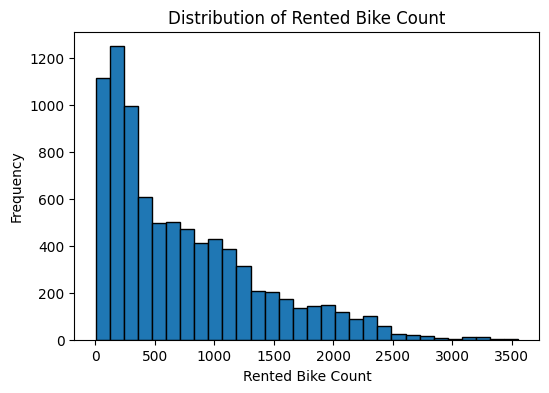

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Rented Bike Count'], bins=30, edgecolor='black')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of Rented Bike Count')
plt.show();

Correlation Analysis
--------

To investigate the relationships between other variables and rented bike counts, we plot a correlation heatmap.

In [ ]:
import seaborn

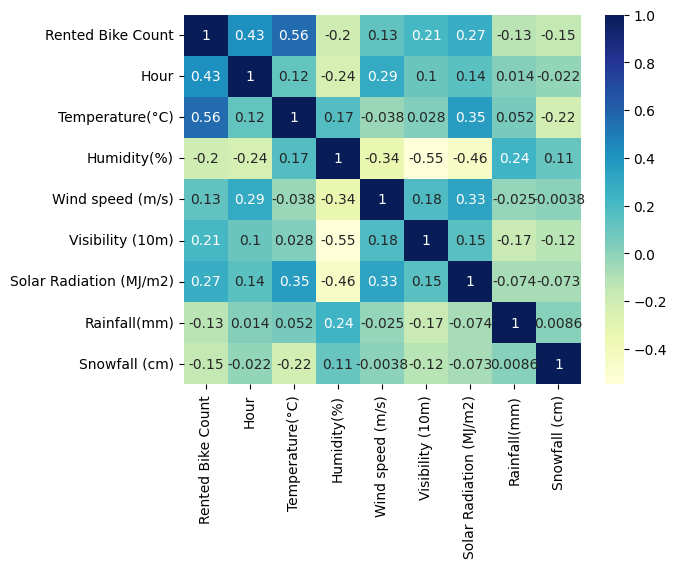

In [ ]:
dataplot = seaborn.heatmap(data_functional.corr(numeric_only=True), cmap="YlGnBu", annot=True)

The analysis reveals that temperature and hour have the most significant correlations with rented bike count. As a result, we conduct further analysis on these variables.

### Average Rented Bike Count by Hour

This figure shows the average number of bikes rented in each hour.


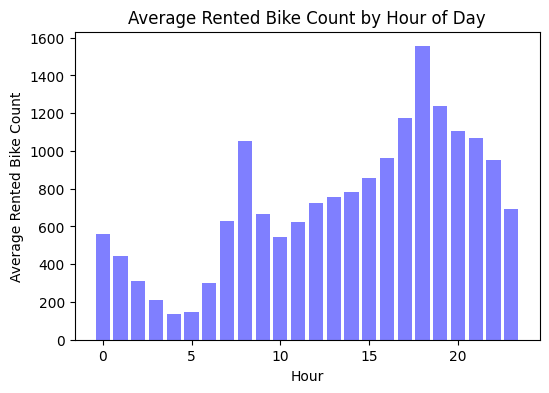

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
hourly_data = data_functional.groupby('Hour').agg({
    'Rented Bike Count': 'mean'
}).reset_index()

hour = hourly_data['Hour']
avg_hourly_bikes = hourly_data['Rented Bike Count']

# Bar chart of Rented Bike Count for each hour of day
plt.bar(hour,
        avg_hourly_bikes,
        color='blue',
        alpha=0.5)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Hour of Day')

# Show the plot
plt.show();

Bikes are most commonly rented at 6:00 PM, with a spike at 8:00 AM, likely for commuting. They are least rented between 4:00-5:00 AM, when most people are asleep.

### Total Bikes Rented and Average Temperature in Each Month

Next, we investigate the relationship between temperature and rented bike count. However, with 8,000 data points and temperature being continuous, a scatter plot or bar chart would be cluttered, thus, we instead used the monthly average temperature and the total rented bike count per month for our analysis.

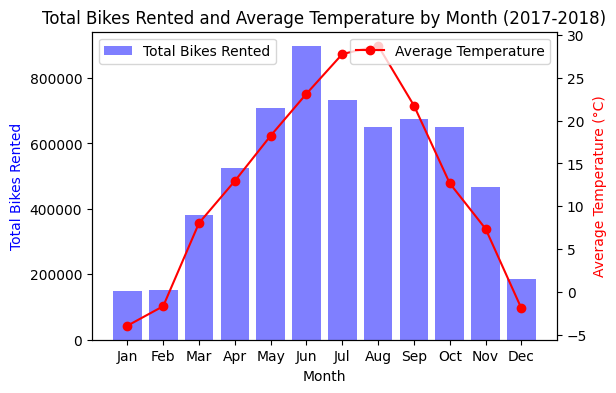

In [ ]:
# Too many data points so investigate by month

# Convert the 'Date' column to datetime
data_functional.loc[:, 'Date'] = pd.to_datetime(data_functional['Date'], dayfirst=True)

# Extract month from the date
data_functional.loc[:, 'Month'] = pd.to_datetime(data_functional['Date'], dayfirst=True).dt.month

# Group by month and calculate the total bike counts and average temperature
monthly_data = data_functional.groupby('Month').agg({
    'Rented Bike Count': 'sum',  # Sum of bike counts for each month
    'Temperature(°C)': 'mean', # Average temperature for each month
    'Humidity(%)': 'mean', # Average humidity for each month
}).reset_index()

# Set up the plot
fig, ax1 = plt.subplots(figsize=(6, 4))

avg_temperature = monthly_data['Temperature(°C)']
rented_bikes_monthly = monthly_data['Rented Bike Count']
months_num = monthly_data['Month']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the total bike counts as barchart
ax1.bar(months,
        rented_bikes_monthly,
        color='b',
        alpha=0.5,
        label='Total Bikes Rented')

# Create a second y-axis to plot the average temperature
ax2 = ax1.twinx()
ax2.plot(months,
         avg_temperature,
         color='r',
         label='Average Temperature',
         marker='o')

# Customizing the plot
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Bikes Rented', color='b')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax1.set_title('Total Bikes Rented and Average Temperature by Month (2017-2018)')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show();

In general, bike rentals tend to increase with average monthly temperatures, with warmer months like June seeing higher rentals. However, in the hottest months, July and August, rentals decrease despite higher temperatures, indicating the trend does not hold at extreme temperatures. This is plausible as moderate warmth encourages outdoor activities, but excessive heat may deter them due to health risks.

We extend our exploratory analysis by examining rented bike count trends based on categorical variables not included in the correlation map: season and holiday.

### Average rented bike count by season

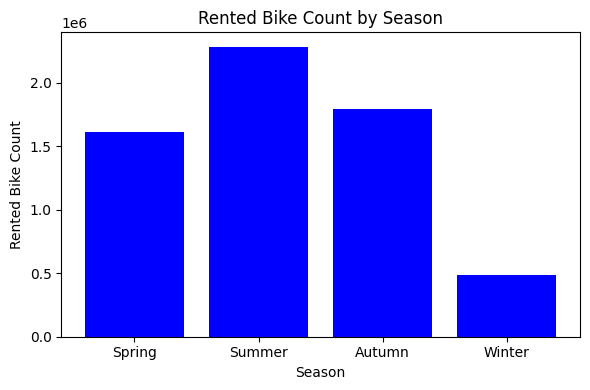

In [ ]:
season_data = data_functional.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
season_data['Seasons'] = pd.Categorical(season_data['Seasons'], categories=season_order, ordered=True)
season_data = season_data.sort_values('Seasons')

plt.figure(figsize=(6, 4))
plt.bar(season_data['Seasons'], season_data['Rented Bike Count'], color='blue')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Season')
plt.tight_layout()
plt.show();

Consistent with our analysis of average monthly temperature, bike rentals peak in summer, followed by autumn, spring, and winter. This supports the idea that warmer temperatures are ideal for outdoor activities, while very cold weather can make roads hazardous for biking.


### Average Number of Rented Bikes on a Holiday vs Non-Holiday

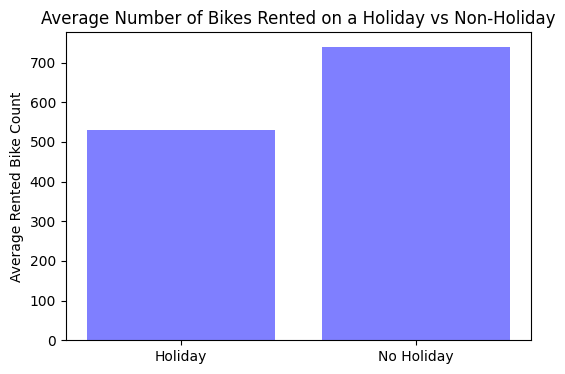

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
holiday_data = data_functional.groupby('Holiday').agg({
    'Rented Bike Count': 'mean'
}).reset_index()

holiday = holiday_data['Holiday']
holiday_bike_count = holiday_data['Rented Bike Count']

# Bar chart of total bikes rented by season
plt.bar(holiday,
        holiday_bike_count,
        color='blue',
        alpha=0.5)

# Add labels and title
plt.ylabel('Average Rented Bike Count')
plt.title('Average Number of Bikes Rented on a Holiday vs Non-Holiday')

# Show the plot
plt.show();

We observe that more bikes are rented on average during non-holidays. This could be for several reasons. Firstly, bikes are often rented during commuting hours, and since holidays eliminate the need to commute to work, the number of rented bikes may drop. Additionally, many people may decide to stay home more often or travel out of town during holidays, further contributing to the decrease in bike rentals. Furthermore, weather conditions may also play a part, as some holidays could coincide with colder weather, which is less ideal for biking activities.

Distribution of Other Non-Categorical Variables
--------

We also summarise the distribution of each non-categorical variable to better understand spread and identify any outliers. Temperature and humidity seem nearly uniformly distributed, though for the latter we observe an outlier near 0%. Wind speed distribution is right-skewed, with outliers at 6-8 m/s. Visibility values largely fall around 20,000m, while solar radiation, rainfall, and snowfall distributions show minimal fluctuation, with most values close to 0 MJ/m², 0 mm, and 0 cm, respectively.

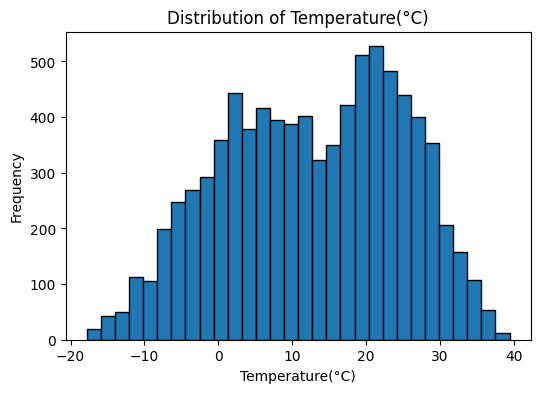

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Temperature(°C)'], bins=30, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Temperature(°C)')
plt.show();

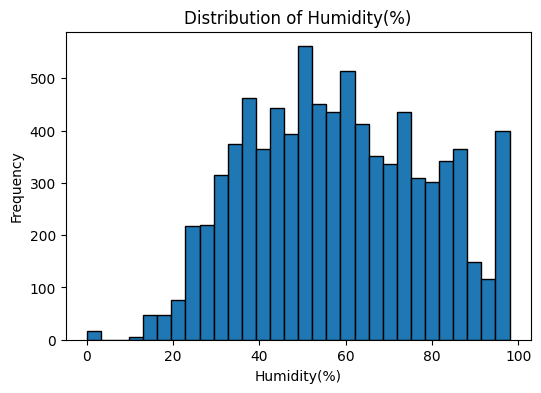

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Humidity(%)'], bins=30, edgecolor='black')
plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Humidity(%)')
plt.show();

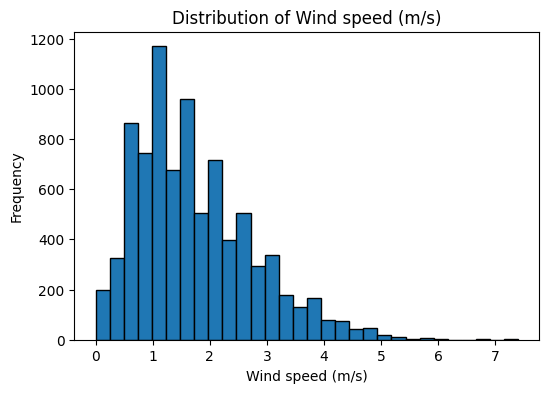

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Wind speed (m/s)'], bins=30, edgecolor='black')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Wind speed (m/s)')
plt.show();

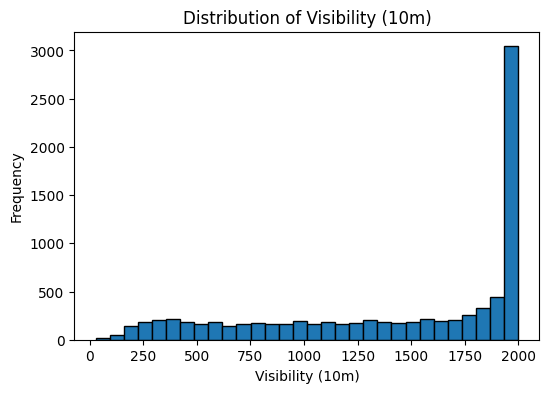

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Visibility (10m)'], bins=30, edgecolor='black')
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Visibility (10m)')
plt.show();

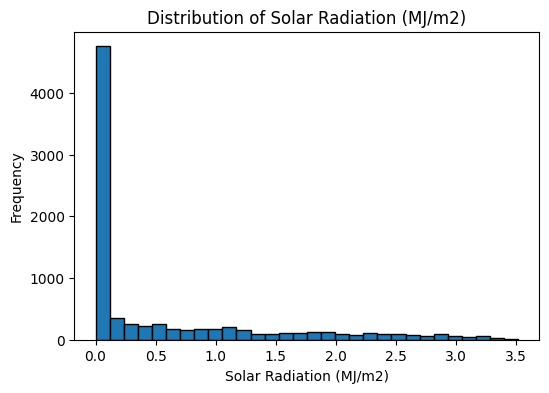

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Solar Radiation (MJ/m2)'], bins=30, edgecolor='black')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Solar Radiation (MJ/m2)')
plt.show();

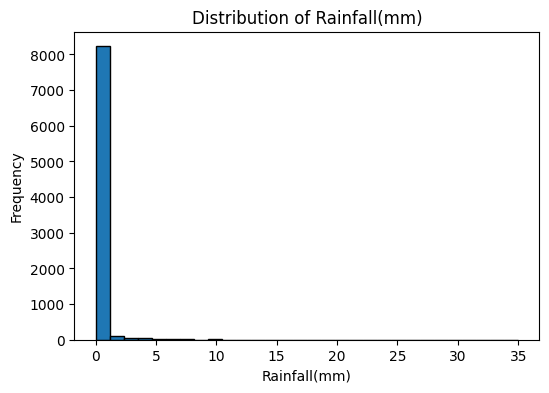

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Rainfall(mm)'], bins=30, edgecolor='black')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Rainfall(mm)')
plt.show();

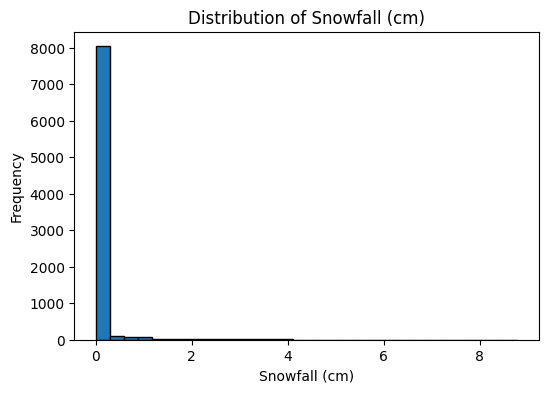

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data_functional['Snowfall (cm)'], bins=30, edgecolor='black')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Snowfall (cm)')
plt.show();

# Feature Engineering


In [ ]:
# As we filtered the functioning day in the last section, we can drop the column here.
df = data_functional.drop('Functioning Day', axis=1).copy()

We convert “Date” to datetime format. Considering that commuters may be the main users of shared bikes, we create new predictor variables "Weekday" and "Weekend" from “Date” for further analysis.


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Create Weekday and Weekend column
df['Weekday'] = df['Date'].apply(lambda x: 1 if x.weekday() < 5 else 0)
df['Weekend'] = df['Date'].apply(lambda x: 1 if x.weekday() >= 5 else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Weekday,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,0


For the categorical variables, we create dummies for Hours, Holiday, and Seasons and convert them from boolean to integer datatype, capturing the effect of variables. For example, by encoding hours, we can better analyze the impact of different time points (peak and non-peak hours) on rented bike count.

In [ ]:
# Create dummies for Hours, Holiday and Seasons
df = pd.get_dummies(df,columns=['Holiday','Seasons','Hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8465 non-null   datetime64[ns]
 1   Rented Bike Count        8465 non-null   int64         
 2   Temperature(°C)          8465 non-null   float64       
 3   Humidity(%)              8465 non-null   int64         
 4   Wind speed (m/s)         8465 non-null   float64       
 5   Visibility (10m)         8465 non-null   int64         
 6   Solar Radiation (MJ/m2)  8465 non-null   float64       
 7   Rainfall(mm)             8465 non-null   float64       
 8   Snowfall (cm)            8465 non-null   float64       
 9   Weekday                  8465 non-null   int64         
 10  Weekend                  8465 non-null   int64         
 11  Holiday_Holiday          8465 non-null   bool          
 12  Holiday_No Holiday       8465 non-null 

In [ ]:
bool_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integer in the original DataFrame
df[bool_columns] = df[bool_columns].astype(int)

# Check the converted columns in the original DataFrame
df.update(df[bool_columns])

# DataFrame df is ready to be used for further analysis
df.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2017-12-01,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-01,173,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017-12-01,107,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-01,78,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


# Model Selection and Training
We will run four supervised machine learning models (linear regression, decision tree, random forest, and gradient boosting).

## Linear Regression

In [ ]:
import statsmodels.api as sm

X = df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)','Weekday','Holiday_Holiday', 'Seasons_Winter', 'Seasons_Spring',
       'Seasons_Summer', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']]
y = df['Rented Bike Count']


# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the OLS model
model_linearregression = sm.OLS(y, X).fit()

# Print the regression summary
print(model_linearregression.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     477.5
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:03:58   Log-Likelihood:                -62113.
No. Observations:                8465   AIC:                         1.243e+05
Df Residuals:                    8429   BIC:                         1.246e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Extract the columns used for fitting the model
features_used = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
                 'Rainfall(mm)', 'Snowfall (cm)', 'Weekday', 'Holiday_Holiday', 'Seasons_Winter', 'Seasons_Spring',
                 'Seasons_Summer', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
                 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
                 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']

# Filter the X variable to include only the features used for fitting the model
X_fit = X[features_used]

# Add a constant term to the predictor
X_fit = sm.add_constant(X_fit)

# Fit the OLS model
model_linearregression = sm.OLS(y, X_fit).fit()

# Use the same set of features for making predictions
X_pred = X_fit

# Calculate the predicted values
y_pred = model_linearregression.predict(X_pred)

# Calculate R-squared
r2_linear = model_linearregression.rsquared
print("R-squared (R2):", r2_linear)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse_linear)

R-squared (R2): 0.6647196501242527
Mean Squared Error (MSE): 138325.36568138513


### Interpretation

The R-squared for the linear regression model is 0.665, indicating that 66% of the variation can be explained by the model. In the regression result table, we can see the temperature, solar radiation, and dummy variables such as weekday, hour 7 to 8, and hour 17 to 23 have positive coefficients with statistical significance, showing the positive relationship between the variables and the outcome. Furthermore, most of the predictors have p-values less than 0.0001, indicating the statistical significance of the independent variables. For example, the "Temperature(°C)" coefficient is 23.7853, suggesting that for a one-unit increase in the variable, the rent bike count is expected to increase by approximately 24 units. Additionally, the standard error for "Temperature(°C)" is 0.787, suggesting that the coefficient estimate for temperature is relatively precise. The coefficients of categorical variables of rental hours show that 7-9 AM and after 4 PM are the peak times with significantly higher demand for bike rental.


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'Actual vs. Predicted values')

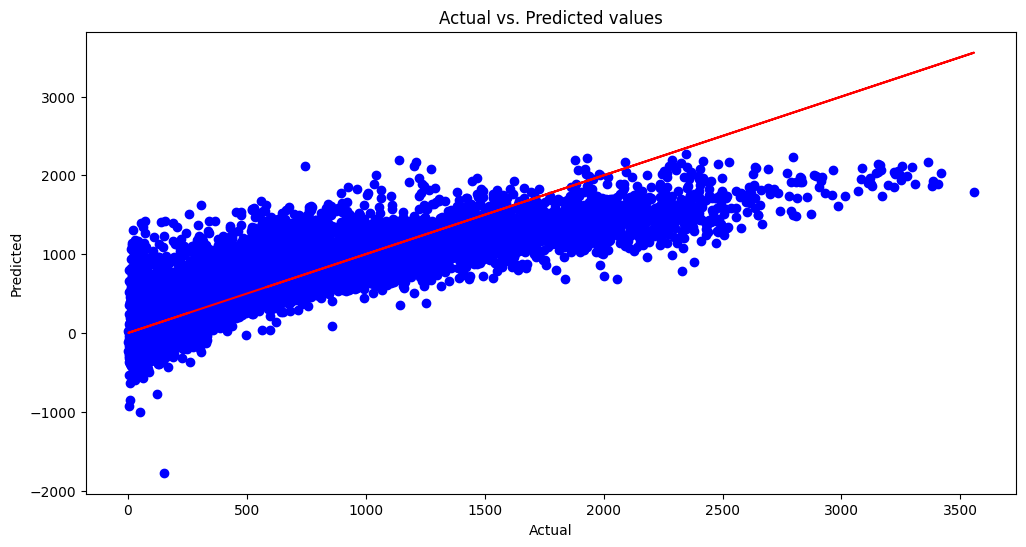

In [ ]:
import matplotlib.pyplot as plt

# Visualize model prediction and actual values
plt.figure(figsize=(12, 6))
plt.scatter(y, model_linearregression.fittedvalues, color='blue')
plt.plot(y, y, color='red')  # Add a diagonal line for comparison
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.show()

Actual vs. Predicted graph visualizes the model's predictions and actual values. The points cluster around the red dashed line for a well-fitted model. The inaccuracy of this model includes that some predicted values ​​are negative (inconsistent with reality) and that the actual values ​​deviate from the prediction for large values.


LinearRegression()

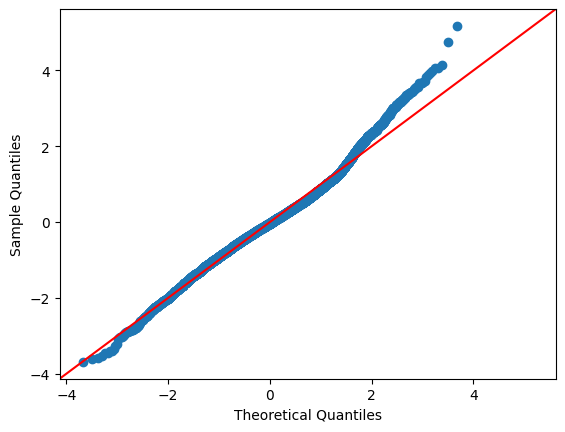

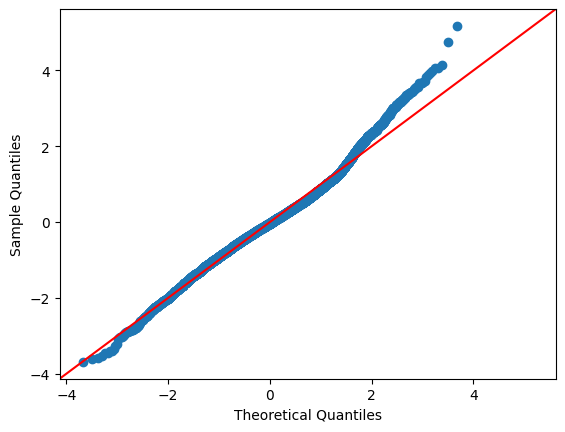

In [ ]:
from sklearn.linear_model import LinearRegression

# Check the normality assumption of the residuals

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate residuals and fitted values
residuals = y - lin_reg.predict(X)
fitted_values = lin_reg.predict(X)

# Create a QQ plot of the residuals
sm.qqplot(residuals, fit=True, line='45')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)','Weekday','Holiday_Holiday', 'Holiday_No Holiday', 'Seasons_Autumn','Seasons_Winter', 'Seasons_Spring',
       'Seasons_Summer', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']]

y = df['Rented Bike Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)

# Initialize the Random Forest Regressor
model_randomforest = RandomForestRegressor(n_estimators=100, random_state=888)

# Train the model
model_randomforest.fit(X_train, y_train)

# Make predictions
predictions = model_randomforest.predict(X_test)
feature_importances = model_randomforest.feature_importances_

# Create a summary DataFrame
summary_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
summary_df1 = summary_df1.sort_values(by='Importance', ascending=False)
summary_df1.reset_index(drop=True, inplace=True)

# Print the summary
display(summary_df1)

RandomForestRegressor(random_state=888)

,Feature,Importance
0,Temperature(°C),0.355392
1,Humidity(%),0.157060
2,Hour_18,0.074150
3,Solar Radiation (MJ/m2),0.055658
4,Hour_19,0.037576
5,Weekday,0.035713
6,Hour_22,0.031725
7,Seasons_Autumn,0.027939
8,Hour_20,0.025475
9,Hour_21,0.024844


In [ ]:
mse_rf = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_rf}')
r2_rf = model_randomforest.score(X_test, y_test)
print(f'R-squared: {r2_rf}')

Mean Squared Error: 43074.269866850394
R-squared: 0.8966490064315535


### Interpretation

The result suggests that the model has high accuracy, as it produces the R-squared score of 89.9%. Moreover, based on the feature importance measurement, the analysis shows that the five most influential predictors are temperature, humidity, hour_18 (dummy variable indicating rental at 6 PM), solar radiation, and hour_19 (dummy variable for rental at 7 PM). The combination of importance of these independent variables accounts for 65% of the total importance, indicating that they play a critical role in determining the outcome. The result also highlights the importance of environmental factors such as temperature, humidity, season, and rainfall.

## XGBoost

In [ ]:
# To import necessary packages
from xgboost import XGBRegressor

In [ ]:
# Initialisation of XGBoost model with default parameters

model_xgb = XGBRegressor(random_state = 888)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=888, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean squared error: %.4f" %mse_xgb)
r2_xgb = r2_score(y_pred_xgb, y_test)
print("R-squared: %.4f" %r2_xgb)

Mean squared error: 43228.6887
R-squared: 0.8838


In [ ]:
# Sort the features by importance
feature_importance_normalised_xgb = model_xgb.feature_importances_
feature_importance_normalised_xgb = pd.DataFrame(zip(X.columns, feature_importance_normalized_xgb), columns = ['Feature', 'Normalised importance'])
feature_importance_normalised_xgb.sort_values(by = 'Normalised importance', ascending = False, inplace = True)
feature_importance_normalised_xgb.reset_index(inplace = True)
feature_importance_normalised_xgb.drop(columns=['index'], inplace = True)
display(feature_importance_normalised_xgb)

,Feature,Normalised importance
0,Hour_18,0.128636
1,Hour_19,0.098317
2,Hour_21,0.083808
3,Hour_20,0.070889
4,Hour_17,0.062962
5,Hour_4,0.061565
6,Hour_5,0.060498
7,Hour_22,0.057087
8,Hour_3,0.035624
9,Seasons_Autumn,0.032043


In [ ]:
rf_feature_ranking = summary_df1['Feature']
xgb_feature_ranking = feature_importance_normalised_xgb['Feature']
feature_ranking_comparison = pd.DataFrame({'Random Forest': rf_feature_ranking, 'XGBoost': xgb_feature_ranking})
feature_ranking_comparison.index = np.arange(1, len(feature_ranking_comparison)+1)
display(feature_ranking_comparison)

,Random Forest,XGBoost
1,Temperature(°C),Hour_18
2,Humidity(%),Hour_19
3,Hour_18,Hour_21
4,Solar Radiation (MJ/m2),Hour_20
5,Hour_19,Hour_17
6,Weekday,Hour_4
7,Hour_22,Hour_5
8,Seasons_Autumn,Hour_22
9,Hour_20,Hour_3
10,Hour_21,Seasons_Autumn


In [ ]:
for x in feature_ranking_comparison['Random Forest'].values:
  if x in feature_ranking_comparison['XGBoost'].values:
    print(1)
  else:
    print(0)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1


### Interpretation

The result suggests that the model produces a high R-squared score of 88.4% despite being lower than the R-squared of the random forest method. Furthermore, based on the feature importance analysis, it is shown that the top five significant predictors are hour_18, hour_19, hour_21, hour_20, and hour_17, which indicates that in this model, the factor of rental time plays an influential role in determining the response variable.

## [Pending] Model Performance Evaluation

In [ ]:
# Summary of R2 and MSE of each model
data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared': [r2_linear, r2_rf, r2_xgb],
    'MSE': [mse_linear, mse_rf, mse_xgb]
}
df_results = pd.DataFrame(data)
df_results


,Model,R-squared,MSE
0,Linear Regression,0.664720,138325.365681
1,Random Forest,0.896649,43074.269867
2,XGBoost,0.883849,43228.688742


R-square, MSE:
Linear regression 66%
Random forest 89.9% -> higher accuracy compared to two other models
XGBoost 88.3%

Further analysis

# Limitations

When conducting regression analysis to predict outcomes, it is crucial to acknowledge the presence of omitted variables that may significantly influence the results but remain unseen. For instance, the average duration per rental can affect demand levels, especially if it affects the waiting list to become excessively long and drive the customers to take another transportation mode, leading to potential prediction inaccuracies.

Additionally, one of our core assumptions is that the relationship between the variables is linear, which may not always hold in real-world scenarios. The model also needs to account for major one-time events, such as demonstrations or strikes in public transportation, which can unexpectedly alter demand and, therefore, skew the accuracy of our results.

Furthermore, the observations used in the analysis tend to be too generalized, as the observations reflect city-wide trends rather than specific rental locations. By utilizing more detailed and precise observations, we could enhance the model's relevance and effectiveness in predicting outcomes more accurately and precisely, as we can also determine number of bikes needed to fulfil the demand in the most detailed level.

# Business recommendations

- The city government needs to consider various factors that are significant in predicting the demand for bike rental, such as xxx (based on regression result).
- Pricing strategy based on significant predictors to improve the service's profitability, for instance discount in non-peak hours (lower demand), subscription vs pay as you go pricing.
  - Consider to give an extra hour in the pricing (currently at 2 hours per rental).
- A basis for the city government to increase the bike supply if needed.
- Branding of the service through a partnership with an ESG company to improve the brand image.

# Conclusion

Reference
=========

https://www.foxweather.com/learn/visibility
https://scijinks.gov/what-is-humidity/
https://www.weather.gov/arx/why_dewpoint_vs_humidity
http://www.bom.gov.au/climate/austmaps/solar-radiation-glossary.shtml
https://www.cnbctv18.com/environment/explained-what-exactly-is-1-mm-of-rainfall-10088051.htm
https://theconversation.com/how-is-snowfall-measured-a-meteorologist-explains-how-volunteers-tally-up-winter-storms-175628
